Student IDs: 301613501, 208560086

**Mount to Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Change working directory to lab folder**

In [2]:
%cd '/content/drive/My Drive/IP Labs/1/'
import os
path = os.getcwd() 
print('path: ' + path)

/content/drive/My Drive/IP Labs/1
path: /content/drive/My Drive/IP Labs/1


**Imports**

In [3]:
%matplotlib inline 
import numpy as np
import matplotlib.pylab as plt
from skimage import color, img_as_ubyte

**Load image and convert to grayscale**
*   Load your image and convert it to grayscale.



In [4]:
# load original
my_img = plt.imread('Lab1_Image.bmp')

# conversion to uint8 grayscale
im_gray = color.rgb2gray(my_img)
im_gray = img_as_ubyte(im_gray)

*   Display your original and grayscale images. Add titles to your images.

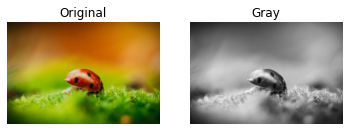

In [5]:
# create figure
fig = plt.figure()

# setting values to rows and column variables
rows = 1
columns = 2
 
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img_as_ubyte(my_img))
plt.axis('off')
plt.title("Original")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img_as_ubyte(im_gray), cmap='gray')
plt.axis('off')
plt.title("Gray")

plt.show()

**Plot 2D Cardioids**

*   Having relatively simple geometric interpretation, the Cardioid is well known for its resemblance to a heart.
*   All the Cardioid equations needed for this notebook can be found [here](https://en.wikipedia.org/wiki/Cardioid).
*   Recreate figure 1 (left) from the lab manual. Generate a 2D plot containing generated rotated Cardioids setting *a=1,2,4*.
*   Note that here (x,y) may be swapped for obtaining the desired result (rotated).
*   **Hint:** Use matplotlib.pyplot.plot

Text(0, 0.5, 'y')

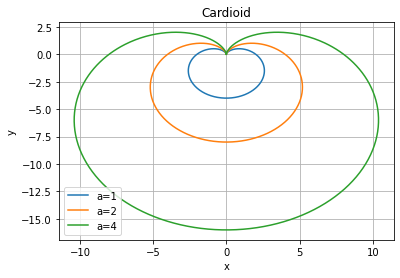

In [6]:
import matplotlib
from matplotlib.pyplot import plot

# set parameters
dphi = 0.01

pi = np.pi
phi = np.arange(0, 2*pi, dphi)

A = [1,2,4]

for a in A:
  x = 2*a*(1-np.cos(phi))*np.sin(phi)
  y = 2*a*(1-np.cos(phi))*np.cos(phi)
  plot(x,y, label = 'a=' + str(a))

plt.legend()
plt.grid()
plt.title('Cardioid')
plt.xlabel('x')
plt.ylabel('y')

**Generate a heart shaped binary mask using Cardioid**
*   Write a new function named *generate_heart_mask(dim,a,c)*.
*   Your function should generate a Cardioid shaped binary mask of size *dim=[h,w]*, where all pixels in its interior are assigned *1*, and *0* elsewhere. See figure 1 (middle).
*   The argument *a* defines the Cardiod radius (in pixels).
*   The argument *c=[cx,cy]* defines the position of its cetner. We consider the point (0,0) in figure 1 (left) to be the Cardioid center. 
*   **Use no loops!** 
*   **Hints:**
  1.   You may want to use *numpy.meshgrid* (read online).
  2.   Recall that the origin of images is commonly located at the upper left corner with the y-axis facing down.



In [7]:
def generate_heart_mask(dim,a,c):
  # parse dimensions
  h, w = dim
  cx, cy = c

  # since the origin of image is located at the upper left corner, we will move 
  # it to the bottom left corner by inverse the y vector order
  x = np.linspace(0, w, num=w)
  y = np.linspace(h, 0, num=h)
  
  xv,yv = np.meshgrid(x,y)
  
  # in order to rotate the shape in 90 degrees, we will replace between x and y 
  x = yv-cy
  y = xv-cx

  mask = ((x**2+y**2)**2+4*a*x*(x**2+y**2)-(2*a*y)**2 < 0)

  return mask

**Plot your generated mask setting:**
*    *dim = [128,128], a = 20, c = [64,100]*
*    *dim = [256,128], a = 20, c = [64,150]*
*    *dim = [128,256], a = 20, c = [128,100]*



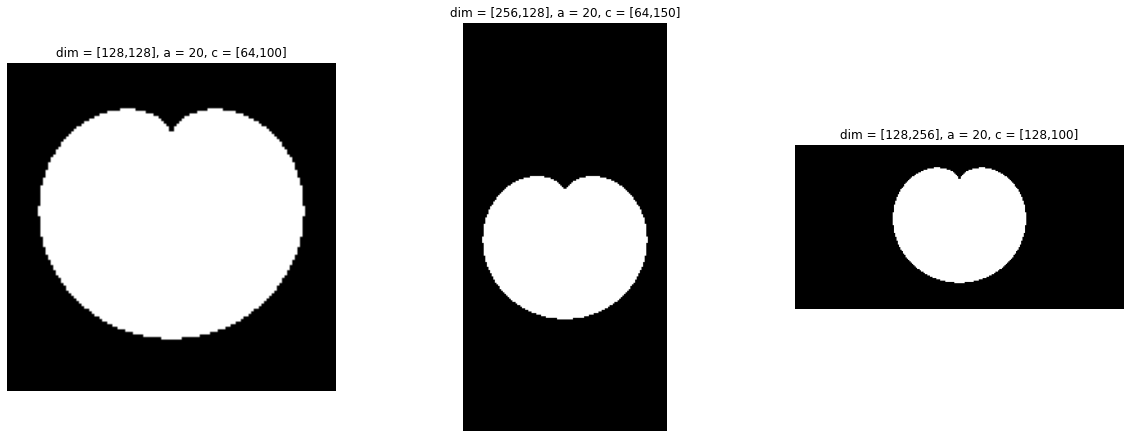

In [8]:
# create figure
fig = plt.figure(figsize=(20,7.5))

# setting values to rows and column variables
rows = 1
columns = 3
 
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img_as_ubyte(generate_heart_mask([128,128],20,[64,100])), cmap='gray')
plt.axis('off')
plt.title("dim = [128,128], a = 20, c = [64,100]")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(generate_heart_mask([256,128],20,[64,150]), cmap='gray')
plt.imshow(img_as_ubyte(generate_heart_mask([256,128],20,[64,150])), cmap='gray')
plt.axis('off')
plt.title("dim = [256,128], a = 20, c = [64,150]")


# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(img_as_ubyte(generate_heart_mask([128,256],20,[128,100])), cmap='gray')
plt.axis('off')
plt.title("dim = [128,256], a = 20, c = [128,100]")

plt.show()

**Generate a masked image**
*   Generate a new Cardioid mask and use it to obtain a masked image. See figure 1 (right).
*   Find the combinarion of arguments to your function which yields the best results.

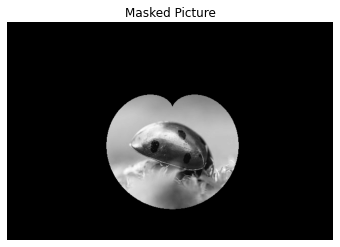

In [9]:
dim = im_gray.shape
a = 50
location = [325,260]

mask = (generate_heart_mask(dim,a,location))
plt.imshow(img_as_ubyte(mask * im_gray), cmap='gray')
plt.axis('off')
plt.title("Masked Picture")

plt.show()